# **Analisis Exploratorio de Datos de la  data German Credit**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

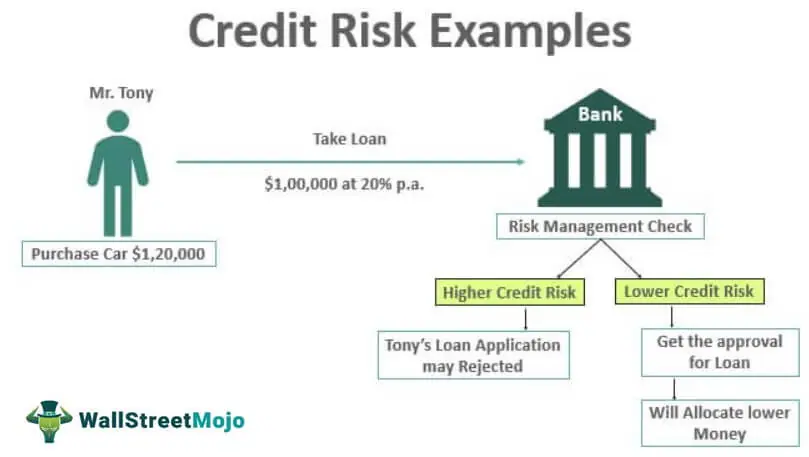

In [ ]:
#@title Riesgo de Crédito en German Credit Data
from IPython.display import Image
Image("/content/drive/MyDrive/Credit-Risk-Examples-2.jpg.jpg")

Una de las industrias que utiliza mucho las soluciones basada en el análisis de datos es la  banca. En particular, vamos a centrarnos por un tiempo en el campo del crédito: se refiere a cualquier operación que implica un operador privado, lo que podría ser un solo individuo en lugar de una familia, y el banco. La idea del crédito  es que el banco se beneficiará de otorgar crédito solo si el cliente no incumple (es decir, no pagará la deuda). En efecto, una vez aceptado como solvente y recibido el crédito, el cliente planificará, junto con el banco, un cronograma de amortización según el cual deberá reembolsar no solo la deuda, sino también los intereses.
























Un primer enfoque podría ser realizar un Análisis Exploratorio de Datos (AED) con datos históricos sobre los clientes del banco y ver cuáles son las características que caracterizan a quienes pagaron la deuda y a quienes no. Luego, cuando un nuevo cliente llegue al banco, el mediante el AED se evaluará y le indicará si pagará la deuda.


Entonces, si por un lado dar crédito es uno de los ingresos de un banco (por los intereses), por el otro implica un riesgo notable. Es por eso que se invierte una gran cantidad de tiempo y dinero en analizar el historial, los hábitos y la probabilidad de pago de la deuda de los clientes.

**Fuente de la data:**

El conjunto de datos contiene 1000 filas con 10 variables .En este conjunto de datos, cada entrada representa a un cliente que recibe un crédito de un banco. Cada cliente se clasifica con riesgo crediticio bueno o malo según el conjunto de variables. El enlace al conjunto de datos original se puede encontrar a continuación.

https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

https://www.kaggle.com/uciml/german-credit

**Variables:**



Edad (numérica)



Sexo (texto: masculino, femenino)




Trabajo (numérico: 0 - no calificado y no residente, 1 - no calificado y 
residente, 2 - calificado, 3 - altamente calificado)



Vivienda (texto: propia, alquilada o gratuita)




Cuenta de ahorros (texto: pequeño, moderado, bastante rico, rico)



Cuenta corriente (numérica, en DM - Deutsch Mark)



Monto del crédito (numérico, en DM)




Duración (numérica, en meses)





Propósito (texto: automóvil, muebles / equipo, radio / TV, electrodomésticos, reparaciones, educación, negocios, vacaciones / otros)




Risk: indica si el cliente cumplirá con el pago o no (Malo , bueno)

In [ ]:
import pandas as pd

In [ ]:
# Montando el Google Drive, para cargar la data y demás archivos

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.Cargando los datos desde Google Drive

In [ ]:
credit = pd.read_csv("/content/drive/MyDrive/german_credit_data.csv") # Hay que copiar la ruta desde Google Drive

In [ ]:
credit.head()  # Viendo las 5 primeras filas del data set credit

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
credit.drop('Unnamed: 0', axis=1, inplace=True) # Eliminando columna Unnamed del dataframe

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


Se observa que el data set tiene 1000 observaciones, 10  variables, 4 son numericas y el resto categóricas.



**Las variables numéricas son:**





Age



Job



Duration  





Credit Amount

In [ ]:
#Show basic stats
credit[['Age', 'Duration', 'Credit amount']].describe().round(1)

,Age,Duration,Credit amount
count,1000.0,1000.0,1000.0
mean,35.5,20.9,3271.3
std,11.4,12.1,2822.7
min,19.0,4.0,250.0
25%,27.0,12.0,1365.5
50%,33.0,18.0,2319.5
75%,42.0,24.0,3972.2
max,75.0,72.0,18424.0


Se observa un resumen de estadísticas descriptivas.Los percentiles P25,P50 y P75, para las variables numéricas Age, Duration y Credit Amount. Se observa valores muy distintos de Credit Amount, respecto de Age y duration.
Un máximo para la cantidad de credit Amount (solicitud de préstamo), de 18424 USD y un minimo de 250 USD.
Por otro lado, duration, tiene un minimo de 4, y un máximo de 72.La edad mínima de los clientes que pidieron crédito, fue de 19 años, y las edad máxima de los clientes que solicitaron préstamo fue de 75 años. 

In [ ]:
credit.groupby('Saving accounts')[['Duration', 'Credit amount']].describe().T.round(1)

Saving accounts       little  moderate    other
Duration      count    786.0     103.0    111.0
              mean      21.0      22.7     18.7
              std       12.0      13.8     10.1
              min        4.0       6.0      6.0
              25%       12.0      12.0     12.0
              50%       18.0      21.0     15.0
              75%       24.0      27.0     24.0
              max       60.0      72.0     48.0
Credit amount count    786.0     103.0    111.0
              mean    3355.1    3384.0   2572.7
              std     2884.4    2874.9   2183.9
              min      276.0     362.0    250.0
              25%     1375.8    1413.5   1268.5
              50%     2325.0    2463.0   1941.0
              75%     4168.0    4145.0   3124.0
              max    18424.0   14782.0  12749.0

In [ ]:
credit["Default"] = credit["Risk"] # Creando la variable Default  (asignación de Risk a Default)
credit.info() # Validando que la variable Default se cre

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
 10  Default           1000 non-null   object
dtypes: int64(4), object(7)
memory usage: 86.1+ KB


In [ ]:
credit = credit.drop(columns="Risk") # Eliminando la varible Risk

In [ ]:

credit.info # Validando que la variable Risk  se elimin

<bound method DataFrame.info of      Age     Sex  Job  ... Duration              Purpose Default
0     67    male    2  ...        6             radio/TV    good
1     22  female    2  ...       48             radio/TV     bad
2     49    male    1  ...       12            education    good
3     45    male    2  ...       42  furniture/equipment    good
4     53    male    2  ...       24                  car     bad
..   ...     ...  ...  ...      ...                  ...     ...
995   31  female    1  ...       12  furniture/equipment    good
996   40    male    3  ...       30                  car    good
997   38    male    2  ...       12             radio/TV    good
998   23    male    2  ...       45             radio/TV     bad
999   27    male    2  ...       45                  car    good

[1000 rows x 10 columns]>

In [ ]:
credit.head() 

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Default
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
credit['Default'].value_counts()

good    700
bad     300
Name: Default, dtype: int64

Identificando valores missing

In [ ]:
credit.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Default               0
dtype: int64

Se observa que las variables Saving Accounts, y Checking account tienen la cantidad de 183  y  394, valores missing respectivamente.

In [ ]:

# count_missing = data.isnull().sum().sort_values(ascending = False)
percentage_missing=round(credit.isnull().sum()/len(credit)*100,2).sort_values(ascending = False)
print(percentage_missing)

# Drop missing values
#Se pueden eliminar filas y clumnas  con missing 
## remove all the rows that contain a missing value
#data.dropna()
# remove all columns with at least one missing value
#columns_with_na_dropped = nfl_data.dropna(axis=1)
#columns_with_na_dropped.head()
# Fuente:https://www.kaggle.com/rtatman/data-cleaning-challenge-handling-missing-values

Checking account    39.4
Saving accounts     18.3
Default              0.0
Purpose              0.0
Duration             0.0
Credit amount        0.0
Housing              0.0
Job                  0.0
Sex                  0.0
Age                  0.0
dtype: float64


In [ ]:
#Imputación de los valores faltantes de todas las columnas numéricas
#Imputación por media, y mediana

#DATA=dataframe.apply(lambda x:x.fillna(x.mean()),axis=0)
#https://www.youtube.com/watch?v=bY7OIJvTMrE&t=396s
#Rocio Chavez

#Reemplazando, imputando los valores perdidos de una columna categorica,por la palabara desconocida
#datanew=dataframe['columna'].fillna('Desconocida',inplace=True)

# Imputando con el valor en la columna catgorica de la fila anterior
# datanew=dataframe.fillna(method='ffill')



# Imputando con el valor en la columna categorica de la fila siguiente
# datanew=dataframe.fillna(method='bfill')


In [ ]:
#Filling missing values with mode
credit["Saving accounts"].fillna(credit['Saving accounts'].mode()[0], inplace=True)


In [ ]:
credit["Checking account"].fillna(credit['Checking account'].mode()[0], inplace=True)

In [ ]:
credit.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Default             0
dtype: int64

In [ ]:
print(credit['Saving accounts'].value_counts())

little        786
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64


Proporción de cuentas de ahorro con ingresos little o moderate y su nivel de Default

In [ ]:
print(credit['Checking account'].value_counts())

little      668
moderate    269
rich         63
Name: Checking account, dtype: int64


# 2.**Análisis Exploratorio de Datos**

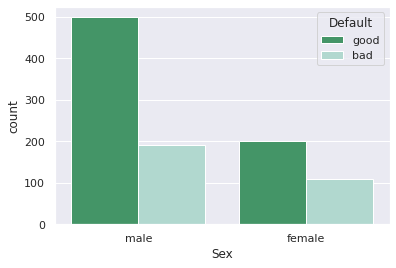

In [ ]:
#importing seaborn for statistical plots

# Colores de palette 
#https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/
#https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette

import seaborn as sns


sns.countplot(x= 'Sex', data = credit, hue= 'Default', palette='BuGn_r')


El gráfico indica que los clientes de sexo masculino, son más propensos a caer en Default, e incumplir con los pagos, respecto de las clientas femeninas.

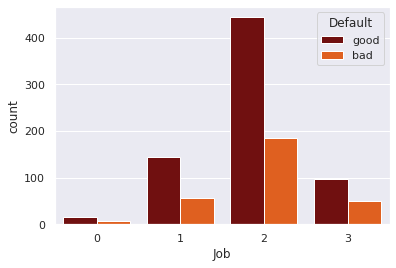

In [ ]:

sns.countplot(x= 'Job', data = credit, hue= 'Default',palette="gist_heat")

Visualmente se indica que los clientes más probables para caer en Default, son aquellos clientes cuyo status en el trabajo es calificado, y altamente calificado.



https://archive.ics.uci.edu/ml/datasets/South+German+Credit+%28UPDATE%29

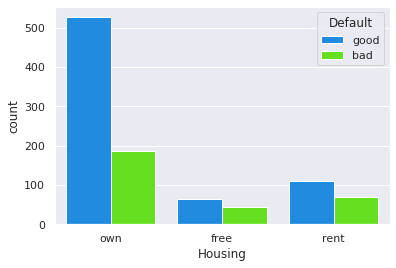

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(x= 'Housing', data = credit, hue= 'Default',palette="gist_rainbow_r" )

El gráfico indica que los clientes con tenencia de vivencia propia , son más propensos a caer en Default, e incumplir con los pagos, respecto de los clientes con tenencia de vivienda sin pagar.

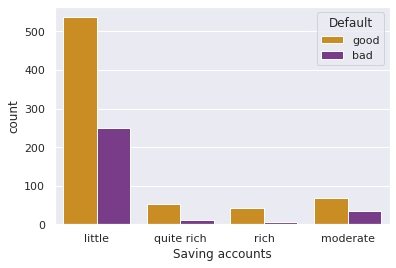

In [ ]:

sns.countplot(x= 'Saving accounts', data = credit, hue= 'Default', palette="CMRmap_r")

Se observa que los clientes  con ingresos bajos o moderados 'tienen más probabilidades de incumplir que el resto de los  clientes

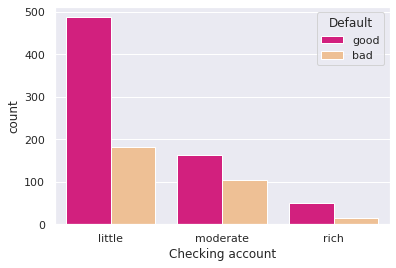

In [ ]:

sns.countplot(x= 'Checking account', data = credit, hue= 'Default', palette='Accent_r')

Por lo tanto, los clientes  con ingresos bajos o moderados tienen proporcionalmente más probabilidades de incumplir que los clientes de ingresos bajos.

In [ ]:
print("\nLittle Income :\n",credit[credit['Checking account'] == 'little']['Default'].value_counts().to_frame())
print("\nModerate Income :\n",credit[credit['Checking account'] == 'moderate']['Default'].value_counts().to_frame())



Little Income :
       Default
good      487
bad       181

Moderate Income :
       Default
good      164
bad       105


**Proporción de cuentas de corriente con ingresos little o moderate y su nivel de Default**

In [ ]:
print("\nModerate Income :\n",credit[credit['Checking account'] == 'moderate']['Default'].value_counts().to_frame())


Moderate Income :
       Default
good      164
bad       105


**Identificando la lista de valores outliers para una variable particular**

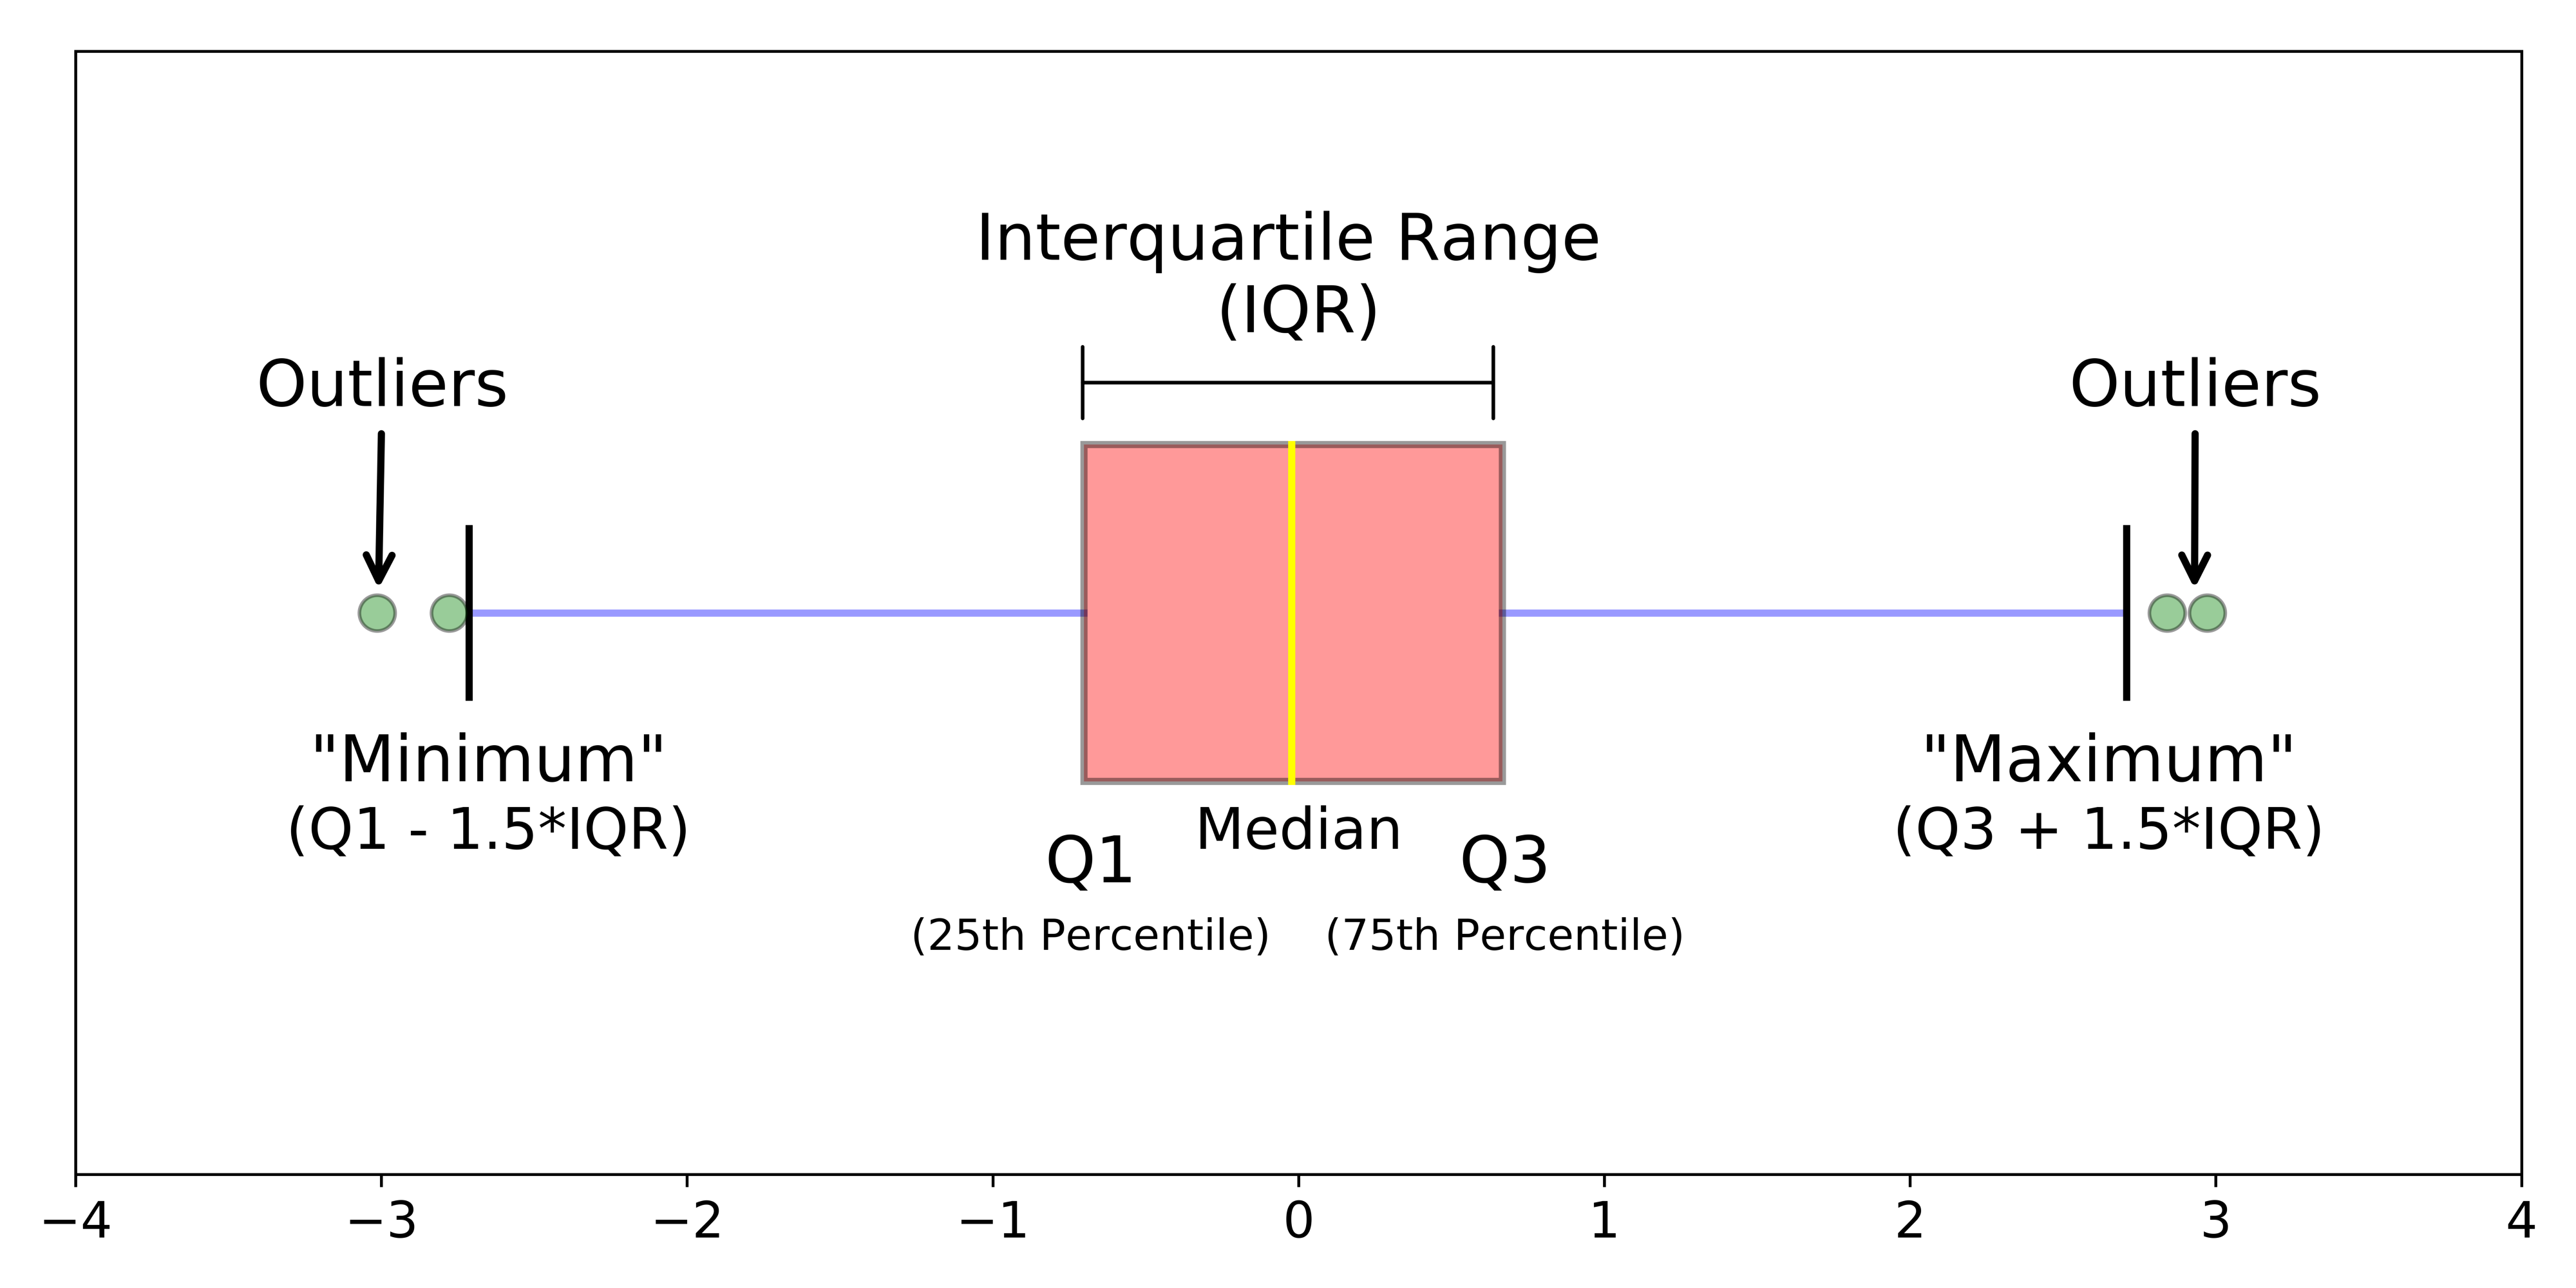

In [ ]:
#@title Detección de Fraude en Tarjetas de Crédito
from IPython.display import Image
Image("/content/drive/MyDrive/outliers.png")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



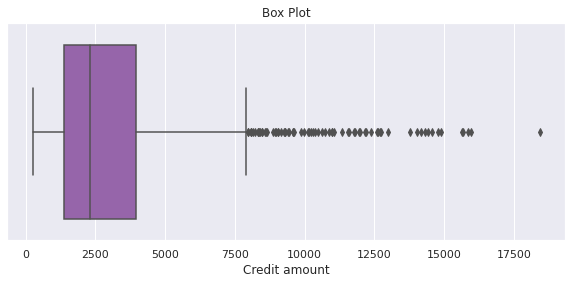

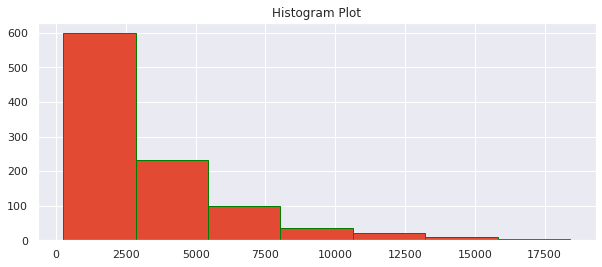

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



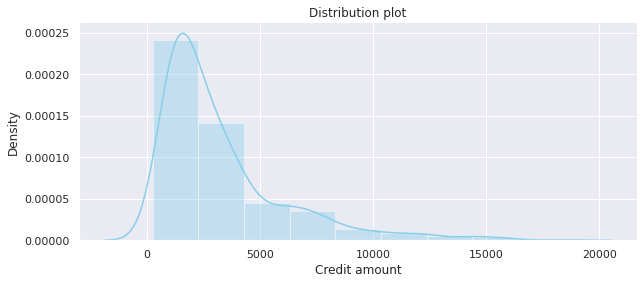

<Figure size 720x288 with 0 Axes>

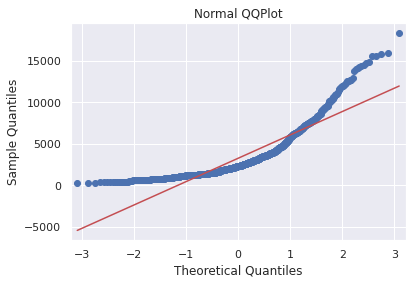

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
#train = pd.read_csv('../input/titanic/train.csv')


# Grafico de caja
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df, color="#9b59b6")
    plt.show()
Box_plots(credit['Credit amount'])


#istograma
def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df, bins=7, color = "#e24a33",edgecolor='green')
    plt.title("Histogram Plot")
    plt.show()
hist_plots(credit['Credit amount'])



def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df,color = "skyblue",bins=9)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
dist_plots(credit['Credit amount'])


# Gráfico qq plot de normalidad
def qq_plots(df):
    plt.figure(figsize=(10, 4))
    qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
qq_plots(credit['Credit amount'])


Los gráficos Box plot, histograma con curva normal ajustada, y qq plot de normalidad, indican que la cantidad de Credit Amount, posee valores atipicos (outliers) , además, también se observa asimetria por la derecha, y desvio de la variable con respecto a la normalidad, por lo que al aplicar un test estadístico, muy probablemente esta variable no se distribuye de forma normal.


In [ ]:
  # Boxplot de Duration

import plotly.express as px
import pandas as pd

#df = pd.read_csv("../data/gapminder_2007.csv")

#print(df.head())

plot = px.box(data_frame=credit,
              
              y='Duration',
              title="Duration")

plot.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution Plot of Credit amount')

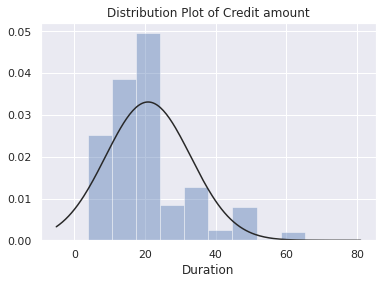

In [ ]:
#Histograma con curva normal ajustada de duration

from scipy.stats import norm

sns.distplot(credit['Duration'],kde=False,bins=10,fit=norm,color='b').set_title('Distribution Plot of Duration')

Los gráficos Box plot, histograma con curva normal ajustada, y qq plot de normalidad, indican que la varaible Duration, posee valores atipicos (outliers) , además, también se observa asimetria por la derecha, y desvio de la variable con respecto a la normalidad, por lo que al aplicar un test estadístico, muy probablemente esta variable no se distribuye de forma normal.

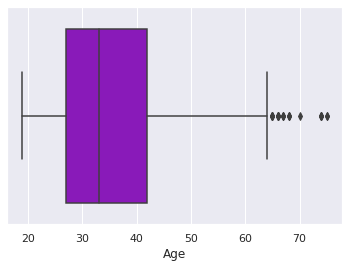

In [ ]:
#Boxplot de la Age

sns.boxplot(x=credit['Age'],color='darkviolet')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution Plot Age')

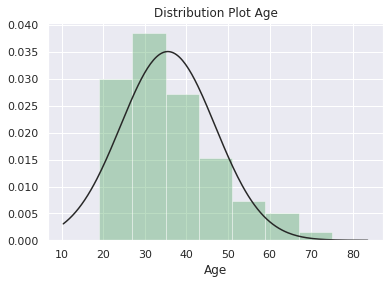

In [ ]:
#Histograma con curva normal ajustada de Age

from scipy.stats import norm

sns.distplot(credit['Age'],kde=False,bins=7,fit=norm,color='g').set_title('Distribution Plot Age')

Los gráficos Box plot, histograma con curva normal ajustada, y qq plot de normalidad, indican que la varaible Age, posee valores atipicos (outliers) , además, también se observa asimetria por la derecha, y desvio de la variable con respecto a la normalidad, por lo que al aplicar un test estadístico, muy probablemente esta variable no se distribuye de forma normal.

**Identificando la lista de valores outliers para una variable Credit Amount**

In [ ]:
import numpy as np

#train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)

In [ ]:
iqr_outliers(credit['Credit amount'])#

Outliers: [9055, 8072, 12579, 9566, 14421, 8133, 9436, 12612, 15945, 11938, 8487, 10144, 8613, 9572, 10623, 10961, 14555, 8978, 12169, 11998, 10722, 9398, 9960, 10127, 11590, 13756, 14782, 14318, 12976, 11760, 8648, 8471, 11328, 11054, 8318, 9034, 8588, 7966, 8858, 12389, 12204, 9157, 15653, 7980, 8086, 10222, 10366, 9857, 14027, 11560, 14179, 12680, 8065, 9271, 9283, 9629, 15857, 8335, 11816, 10875, 9277, 15672, 8947, 10477, 18424, 14896, 12749, 10297, 8358, 10974, 8386, 8229]


In [ ]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [ ]:
out_iqr(credit,'Credit amount')# Devuelve la cantidad de outliers y los limites box plot

The IQR is 2606.75
The lower bound value is -2544.625
The upper bound value is 7882.375
Total number of outliers are 72


**Segunda forma de detectar outliers**

In [ ]:
Q1 = credit['Credit amount'].quantile(0.25)
Q3 = credit['Credit amount'].quantile(0.75)
Q1, Q3

(1365.5, 3972.25)

In [ ]:
# Rango intercuartil
IQR = Q3 - Q1
IQR

2606.75

In [ ]:
#Limite inferior y superior de box plot
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-2544.625, 7882.375)

Lista de outliers

In [ ]:
#Outliers valores inferiores a limite inferior ,lower_limit = Q1 - 1.5*IQR
#Outliers valores suoeriores  a limite inferior, upper_limit = Q3 + 1.5*IQR
credit[(credit['Credit amount']<lower_limit)|(credit['Credit amount']>upper_limit)]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Default
5,35,male,1,free,little,little,9055,36,education,good
17,25,male,2,own,little,little,8072,30,business,good
18,44,female,3,free,little,moderate,12579,24,car,bad
57,31,female,2,own,little,little,9566,36,radio/TV,good
63,25,male,2,own,little,moderate,14421,48,business,bad
...,...,...,...,...,...,...,...,...,...,...
927,39,male,2,free,little,little,10297,48,car,bad
945,30,female,2,own,quite rich,moderate,8358,48,car,good
953,26,female,3,own,little,little,10974,36,furniture/equipment,bad
980,49,male,2,own,little,moderate,8386,30,furniture/equipment,bad


**Removiendo los outliers de Credit Amount, creando dataset sin outliers**

In [ ]:
df_no_outlier = credit[(credit['Credit amount']>lower_limit)&(credit['Credit amount']<upper_limit)]
df_no_outlier

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Default
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,little,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,little,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [ ]:
# Outliers de la variable Duration

In [ ]:
Q1 = credit['Duration'].quantile(0.25)
Q3 = credit['Duration'].quantile(0.75)
Q1, Q3

(12.0, 24.0)

In [ ]:
# Rango intercuartil
IQR = Q3 - Q1
IQR

12.0

In [ ]:
#Limite inferior y superior de box plot
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-6.0, 42.0)

In [ ]:
#Lista de los outliers de Duration
#Outliers valores inferiores a limite inferior ,lower_limit = Q1 - 1.5*IQR
#Outliers valores suoeriores  a limite inferior, upper_limit = Q3 + 1.5*IQR
credit[(credit['Duration']<lower_limit)|(credit['Duration']>upper_limit)]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Default
1,22,female,2,own,little,moderate,5951,48,5,1
11,24,female,2,rent,little,little,4308,48,0,1
29,63,male,2,own,little,little,6836,60,0,1
35,25,male,1,own,little,moderate,4746,45,5,1
36,31,male,2,free,little,little,6110,48,3,0
...,...,...,...,...,...,...,...,...,...,...
945,30,female,2,own,other,moderate,8358,48,1,0
973,36,male,2,rent,little,little,7297,60,0,1
981,33,male,3,rent,little,little,4844,48,0,1
998,23,male,2,free,little,little,1845,45,5,1


In [ ]:
# Removiendo los outliers de Duration
df_no_outlier = credit[(credit['Duration']>lower_limit)&(credit['Duration']<upper_limit)]
df_no_outlier

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Default
0,67,male,2,own,little,little,1169,6,5,0
2,49,male,1,own,little,little,2096,12,3,0
4,53,male,2,free,little,little,4870,24,1,1
5,35,male,1,free,little,little,9055,36,3,0
6,53,male,2,own,other,little,2835,24,4,0
...,...,...,...,...,...,...,...,...,...,...
993,30,male,3,own,little,little,3959,36,4,0
994,50,male,2,own,little,little,2390,12,1,0
995,31,female,1,own,little,little,1736,12,4,0
996,40,male,3,own,little,little,3857,30,1,0


In [ ]:
# Outliers de la variable Age

In [ ]:
Q1 = credit['Age'].quantile(0.25)
Q3 = credit['Age'].quantile(0.75)
Q1, Q3

(27.0, 42.0)

In [ ]:
# Rango intercuartil
IQR = Q3 - Q1
IQR

15.0

In [ ]:
#Limite inferior y superior de box plot
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(4.5, 64.5)

In [ ]:
#Lista de los outliers de Age
#Outliers valores inferiores a limite inferior ,lower_limit = Q1 - 1.5*IQR
#Outliers valores suoeriores  a limite inferior, upper_limit = Q3 + 1.5*IQR
credit[(credit['Age']<lower_limit)|(credit['Age']>upper_limit)]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Default
0,67,male,2,own,little,little,1169,6,5,0
75,66,male,3,free,little,little,1526,12,1,0
137,66,male,1,own,other,moderate,766,12,5,1
163,70,male,3,free,little,moderate,7308,10,1,0
179,65,male,2,own,little,little,571,21,1,0
186,74,female,3,free,little,moderate,5129,9,1,1
187,68,male,0,free,little,moderate,1175,16,1,0
213,66,male,3,own,little,other,1908,30,0,1
330,75,male,3,free,little,little,6615,24,1,0
430,74,male,1,own,little,little,3448,5,0,0


In [ ]:
# Removiendo los outliers de Age
df_no_outlier = credit[(credit['Age']>lower_limit)&(credit['Age']<upper_limit)]
df_no_outlier

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Default
1,22,female,2,own,little,moderate,5951,48,5,1
2,49,male,1,own,little,little,2096,12,3,0
3,45,male,2,free,little,little,7882,42,4,0
4,53,male,2,free,little,little,4870,24,1,1
5,35,male,1,free,little,little,9055,36,3,0
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,little,1736,12,4,0
996,40,male,3,own,little,little,3857,30,1,0
997,38,male,2,own,little,little,804,12,5,0
998,23,male,2,free,little,little,1845,45,5,1


#3.Ingenieria de caracteristicas


Según la inferencia de 'Cuenta de ahorros' y 'Cuenta corriente', podemos agrupar las columnas en 3 categorías:

'Little'

'Moderate'

'Other'

In [ ]:
# 'Saving Account'
credit['Saving accounts']=credit['Saving accounts'].map({'little': 'little', 'moderate': 'moderate', 'quite rich':'other','rich':'other' })

In [ ]:
# 'Checking Account'
credit['Checking account']= credit['Checking account'].map({'little': 'little', 'moderate': 'moderate','rich':'other'})

In [ ]:
# La variable Purpose tiene muchas categorias
## LabeEncoding the Purpose column
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
le = LabelEncoder()
credit['Purpose'] = le.fit_transform(credit['Purpose'])



In [ ]:
print("The various purposes are: ", le.classes_.tolist(), "\nAnd the hot encoded numbers for the same are", credit['Purpose'].unique().tolist())

The various purposes are:  ['business', 'car', 'domestic appliances', 'education', 'furniture/equipment', 'radio/TV', 'repairs', 'vacation/others'] 
And the hot encoded numbers for the same are [5, 3, 4, 1, 0, 2, 6, 7]


In [ ]:
credit.head() 

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Default
0,67,male,2,own,little,little,1169,6,5,good
1,22,female,2,own,little,moderate,5951,48,5,bad
2,49,male,1,own,little,little,2096,12,3,good
3,45,male,2,free,little,little,7882,42,4,good
4,53,male,2,free,little,little,4870,24,1,bad


4. Data Processing

Asignación  'Dependent' and 'Independent' Features

In [ ]:
##credit['default'] = credit['default'].map({'no':0, 'yes': 1})

credit['Default'] = credit['Default'].map({'good':0, 'bad': 1})

In [ ]:
print(credit['Default'].value_counts()) ## Distribución de frecuencia del target Default

0    700
1    300
Name: Default, dtype: int64


In [ ]:
#separating the y-column from the rest of the data


X=credit.drop("Default", axis=1)

y=credit["Default"]


In [ ]:
x1 = X.copy()
x1

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,5
1,22,female,2,own,little,moderate,5951,48,5
2,49,male,1,own,little,little,2096,12,3
3,45,male,2,free,little,little,7882,42,4
4,53,male,2,free,little,little,4870,24,1
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,little,1736,12,4
996,40,male,3,own,little,little,3857,30,1
997,38,male,2,own,little,little,804,12,5
998,23,male,2,free,little,little,1845,45,5




**Estandarización de la data**: Dummification de caracteristicas categóricas y estandarización de caracteristicas numéricas

In [ ]:
# List to store Categorical Columns
cat_cols = list(x1.columns[x1.dtypes == 'object'])
print("Categorical Columns: ",cat_cols)


Categorical Columns:  ['Sex', 'Housing', 'Saving accounts', 'Checking account']


In [ ]:
# List to store Numerical Columns
num_cols = list(x1.columns[x1.dtypes!= 'object'])
print("\nNumerical Columns:" ,num_cols)




Numerical Columns: ['Age', 'Job', 'Credit amount', 'Duration', 'Purpose']


*Etiquetado de caracteristicas categoricas:
La mayor parte de los agoritmos de ML, trabajan con caracteristicas numericas.

In [ ]:
## One-Hot Encoding Categorical Columns
## drop_first=True evita la multicolibnealidad entre las caracteristicas

x1_dummy=pd.get_dummies(x1[cat_cols], drop_first=True)
x1_dummy 

,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_other,Checking account_moderate,Checking account_other
0,1,1,0,0,0,0,0
1,0,1,0,0,0,1,0
2,1,1,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,0
996,1,1,0,0,0,0,0
997,1,1,0,0,0,0,0
998,1,0,0,0,0,0,0


In [ ]:
## Joining New dummified and Numerical columns
x_new = pd.concat([x1_dummy, x1[num_cols]], axis=1, join='inner')
#x_new = pd.concat([x1_dummy, x1[num_cols]], axis=1, join='inner')

Estandarización:
StandardScaler estandariza una característica restando la media y luego escalando a la varianza de la unidad. La varianza unitaria significa dividir todos los valores por la desviación estándar.

In [ ]:
## Estandarización: StandardScaler estandariza una característica restando la media y 
## luego escalando a la varianza de la unidad. La varianza unitaria significa dividir 
## todos los valores por la desviación estándar. 

#### Normalizing the Dataset
ss = StandardScaler()
x_normal = ss.fit_transform(x_new)